In [11]:
import pandas as pd

# 將每季累計的財務數據改成單季的數據
def toSeasonal(df):
    season4 = df[df.index.month == 3]
    season1 = df[df.index.month == 5]
    season2 = df[df.index.month == 8]
    season3 = df[df.index.month == 11]

    season1.index = season1.index.year
    season2.index = season2.index.year
    season3.index = season3.index.year
    season4.index = season4.index.year - 1

    newseason1 = season1
    newseason2 = season2 - season1.reindex_like(season2)
    newseason3 = season3 - season2.reindex_like(season3)
    newseason4 = season4 - season3.reindex_like(season4)

    newseason1.index = pd.to_datetime(newseason1.index.astype(str) + '-05-15')
    newseason2.index = pd.to_datetime(newseason2.index.astype(str) + '-08-14')
    newseason3.index = pd.to_datetime(newseason3.index.astype(str) + '-11-14')
    newseason4.index = pd.to_datetime((newseason4.index + 1).astype(str) + '-03-31')

    return newseason1.append(newseason2).append(newseason3).append(newseason4).sort_index()


# 資優生策略

In [24]:
import pandas as pd

def mystrategy2(data):
    
    股本 = data.get('股本合計', 1)#.drop_duplicates(['stock_id', 'date'], keep='last')#.pivot(index='date', columns='stock_id')
    price = data.get('收盤價', 200)
    當天股價 = price[:股本.index[-1]].iloc[-1]
    當天股本 = 股本.iloc[-1]
    市值 = 當天股本 * 當天股價 / 10 * 1000
   

    df1 = toSeasonal(data.get('投資活動之淨現金流入（流出）', 5))
    df2 = toSeasonal(data.get('營業活動之淨現金流入（流出）', 5))
    自由現金流 = (df1 + df2).iloc[-4:].mean()
    
    
    稅後淨利 = data.get('本期淨利（淨損）', 1)
    
    # 股東權益，有兩個名稱，有些公司叫做權益總計，有些叫做權益總額
    # 所以得把它們抓出來
    權益總計 = data.get('權益總計', 1)
    權益總額 = data.get('權益總額', 1)
    
    # 並且把它們合併起來
    權益總計.fillna(權益總額, inplace=True)
        
    股東權益報酬率 = 稅後淨利.iloc[-1] / 權益總計.iloc[-1]
    
    
    營業利益 = data.get('營業利益（損失）', 5)
    營業利益成長率 = (營業利益.iloc[-1] / 營業利益.iloc[-5] - 1) * 100
    
    
    當月營收 = data.get('當月營收', 4) * 1000
    當季營收 = 當月營收.iloc[-4:].sum()
    市值營收比 = 市值 / 當季營收
    
    rsv = (price.iloc[-1] - price.iloc[-150:].min()) / (price.iloc[-150:].max() - price.iloc[-150:].min())
    
    
    condition1 = (市值 < 1e10)
    condition2 = 自由現金流 > 0
    condition3 = 股東權益報酬率 > 0
    condition4 = 營業利益成長率 > 0
    condition5 = 市值營收比 < 3
    condition6 = rsv > 0.5
    
#     select_stock = condition1 & condition2 & condition3 & condition4 & condition5
    select_stock = condition1 & condition2 & condition3 & condition4 & condition5 & condition6
    
    return select_stock[select_stock]
mystrategy2(data)

stock_id
1220    True
1474    True
1513    True
1519    True
1582    True
1712    True
1735    True
1810    True
2010    True
2013    True
2020    True
2033    True
2314    True
2380    True
2415    True
2417    True
2421    True
2430    True
2440    True
2459    True
2472    True
2515    True
2597    True
2613    True
2642    True
2727    True
3006    True
3029    True
3032    True
3038    True
3048    True
3209    True
3380    True
3550    True
3679    True
4104    True
4722    True
4739    True
5538    True
6215    True
6251    True
6281    True
8103    True
8110    True
8114    True
8271    True
8367    True
9905    True
9927    True
dtype: bool

### 回測

2017-05-25 - 2017-06-25 報酬率: 1.18 % nstock 38
2017-06-25 - 2017-07-26 報酬率: -0.04 % nstock 40
2017-07-26 - 2017-08-26 報酬率: 10.13 % nstock 32
2017-08-26 - 2017-09-26 報酬率: -3.14 % nstock 31
2017-09-26 - 2017-10-27 報酬率: 5.11 % nstock 28
2017-10-27 - 2017-11-27 報酬率: 2.36 % nstock 40
2017-11-27 - 2017-12-28 報酬率: 0.79 % nstock 37
2017-12-28 - 2018-01-28 報酬率: 1.14 % nstock 40
2018-01-28 - 2018-02-28 報酬率: 0.71 % nstock 45
2018-02-28 - 2018-03-31 報酬率: 1.70 % nstock 37
2018-03-31 - 2018-05-01 報酬率: 3.22 % nstock 28
2018-05-01 - 2018-06-01 報酬率: 4.75 % nstock 25
2018-06-01 - 2018-07-02 報酬率: -3.05 % nstock 24
2018-07-02 - 2018-08-02 報酬率: 0.65 % nstock 24
2018-08-02 - 2018-09-02 報酬率: 0.17 % nstock 16
2018-09-02 - 2018-10-03 報酬率: -3.88 % nstock 18
2018-10-03 - 2018-11-03 報酬率: -7.68 % nstock 16
2018-11-03 - 2018-12-04 報酬率: 4.67 % nstock 9
2018-12-04 - 2019-01-04 報酬率: -3.46 % nstock 25
2019-01-04 - 2019-02-04 報酬率: 4.87 % nstock 16
2019-02-04 - 2019-03-07 報酬率: 3.02 % nstock 20
2019-03-07 - 2019-04-07 報酬率:

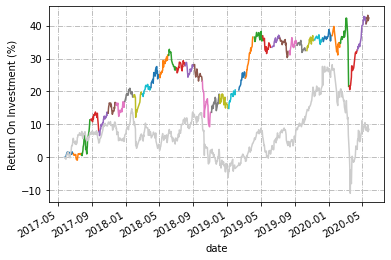

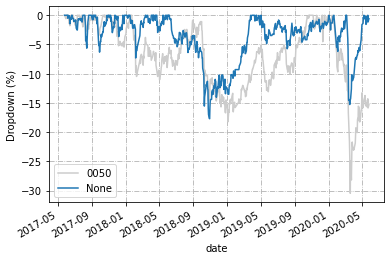

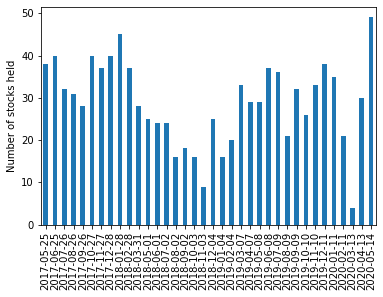

In [27]:
from finlab.backtest import backtest
from finlab.data import Data
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

data = Data()

# 起始結束日期
start = datetime.date(2017, 5, 25)
end = datetime.date(2020, 5, 25)

# 回測
eq = backtest(start, end, 31, mystrategy2, data)